In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from regressors import stats as statts
from scipy import stats as statt
from scipy.stats import shapiro
from tabulate import tabulate
from prettytable import PrettyTable
import warnings # this was used to filter warning in my code
warnings.filterwarnings('ignore')

### Task 6

##### a. Load the MPIAssignment.xlsx into your programming environment

In [2]:
df_mpi=pd.read_excel("MPIAssignment.xlsx")
df_MPI=df_mpi

In [3]:
# Checking if there are some missing data in our dataset
df_mpi.isnull().sum()

FID               0
Prov_ID           0
Province          0
Dist_ID           0
District          0
Sect_ID           0
Sector            0
nightlight_sum    0
landscan_pop      0
mpi_headcount     0
mpi_intensity     0
mpi               0
Area              0
dtype: int64

In [4]:
# Checking the columns in our dataset
df_mpi.columns

Index(['FID', 'Prov_ID', 'Province', 'Dist_ID', 'District', 'Sect_ID',
       'Sector', 'nightlight_sum', 'landscan_pop', 'mpi_headcount',
       'mpi_intensity', 'mpi', 'Area'],
      dtype='object')

In [5]:
# Checking the datatypes of each column in our dataset
df_mpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FID             416 non-null    int64  
 1   Prov_ID         416 non-null    int64  
 2   Province        416 non-null    object 
 3   Dist_ID         416 non-null    int64  
 4   District        416 non-null    object 
 5   Sect_ID         416 non-null    int64  
 6   Sector          416 non-null    object 
 7   nightlight_sum  416 non-null    float64
 8   landscan_pop    416 non-null    int64  
 9   mpi_headcount   416 non-null    float64
 10  mpi_intensity   416 non-null    float64
 11  mpi             416 non-null    float64
 12  Area            416 non-null    float64
dtypes: float64(5), int64(5), object(3)
memory usage: 42.4+ KB


In [6]:
variables = PrettyTable()
variables.field_names = ["Feature Variables", "Dependent variables"]
variables.add_row(["Nightlight sum", "mpi"])
variables.add_row(["Landascan population", ""])
variables.add_row(["mpi headcount", ""])
variables.add_row(["mpi intensity", ""])


variables.border = True  
variables.title = "Variables " 
variables.title_style = {"border": True, "color": "blue"} 

# Print the table
print(variables)


+--------------------------------------------+
|                 Variables                  |
+----------------------+---------------------+
|  Feature Variables   | Dependent variables |
+----------------------+---------------------+
|    Nightlight sum    |         mpi         |
| Landascan population |                     |
|    mpi headcount     |                     |
|    mpi intensity     |                     |
+----------------------+---------------------+


#### Data Exploration

b. Plot histograms of each of the features and the dependent variable
i. Are the variables normally distributed?

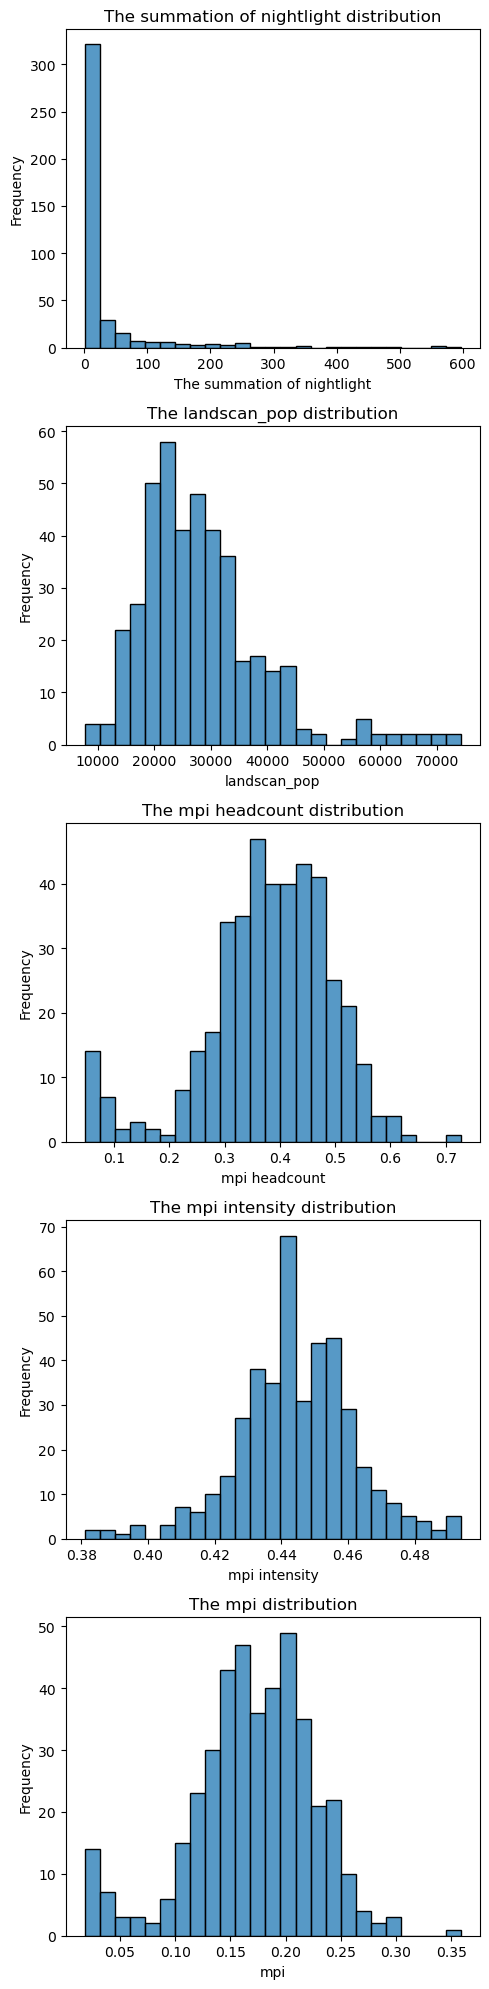

<Figure size 640x480 with 0 Axes>

In [7]:
fig, axs = plt.subplots(5, 1, figsize=(5, 20))


sns.histplot(df_mpi['nightlight_sum'], bins=25, ax=axs[0])
sns.histplot(df_mpi['landscan_pop'], bins=25, ax=axs[1])
sns.histplot(df_mpi['mpi_headcount'], bins=25, ax=axs[2])
sns.histplot(df_mpi['mpi_intensity'], bins=25, ax=axs[3])
sns.histplot(df_mpi['mpi'], bins=25, ax=axs[4])

axs[0].set(title='The summation of nightlight distribution', xlabel='The summation of nightlight', ylabel='Frequency')
axs[1].set(title='The landscan_pop distribution', xlabel='landscan_pop', ylabel='Frequency')
axs[2].set(title='The mpi headcount distribution', xlabel='mpi headcount', ylabel='Frequency')
axs[3].set(title='The mpi intensity distribution', xlabel='mpi intensity', ylabel='Frequency')
axs[4].set(title='The mpi distribution', xlabel='mpi', ylabel='Frequency')

fig.tight_layout()
plt.show()
plt.savefig("histplots.png")

##### Checking if variables are normaly distributed

In [8]:
variables = ['nightlight_sum', 'landscan_pop', 'mpi_headcount', 'mpi_intensity', 'mpi']
alpha = 0.05

for variable in variables:
    stat, p = shapiro(df_mpi[variable])
    
    if p > alpha:
        print(f'{variable}: Sample looks Gaussian (fail to reject H0)')
    else:
        print(f'{variable}: Sample does not look Gaussian (reject H0)')


nightlight_sum: Sample does not look Gaussian (reject H0)
landscan_pop: Sample does not look Gaussian (reject H0)
mpi_headcount: Sample does not look Gaussian (reject H0)
mpi_intensity: Sample does not look Gaussian (reject H0)
mpi: Sample does not look Gaussian (reject H0)


c. Create scatter plots of the mpi (dependent variable) vs each of the features
i. Are the relationships between the features and the dependent
variable linear?
ii. Are there significant outliers?

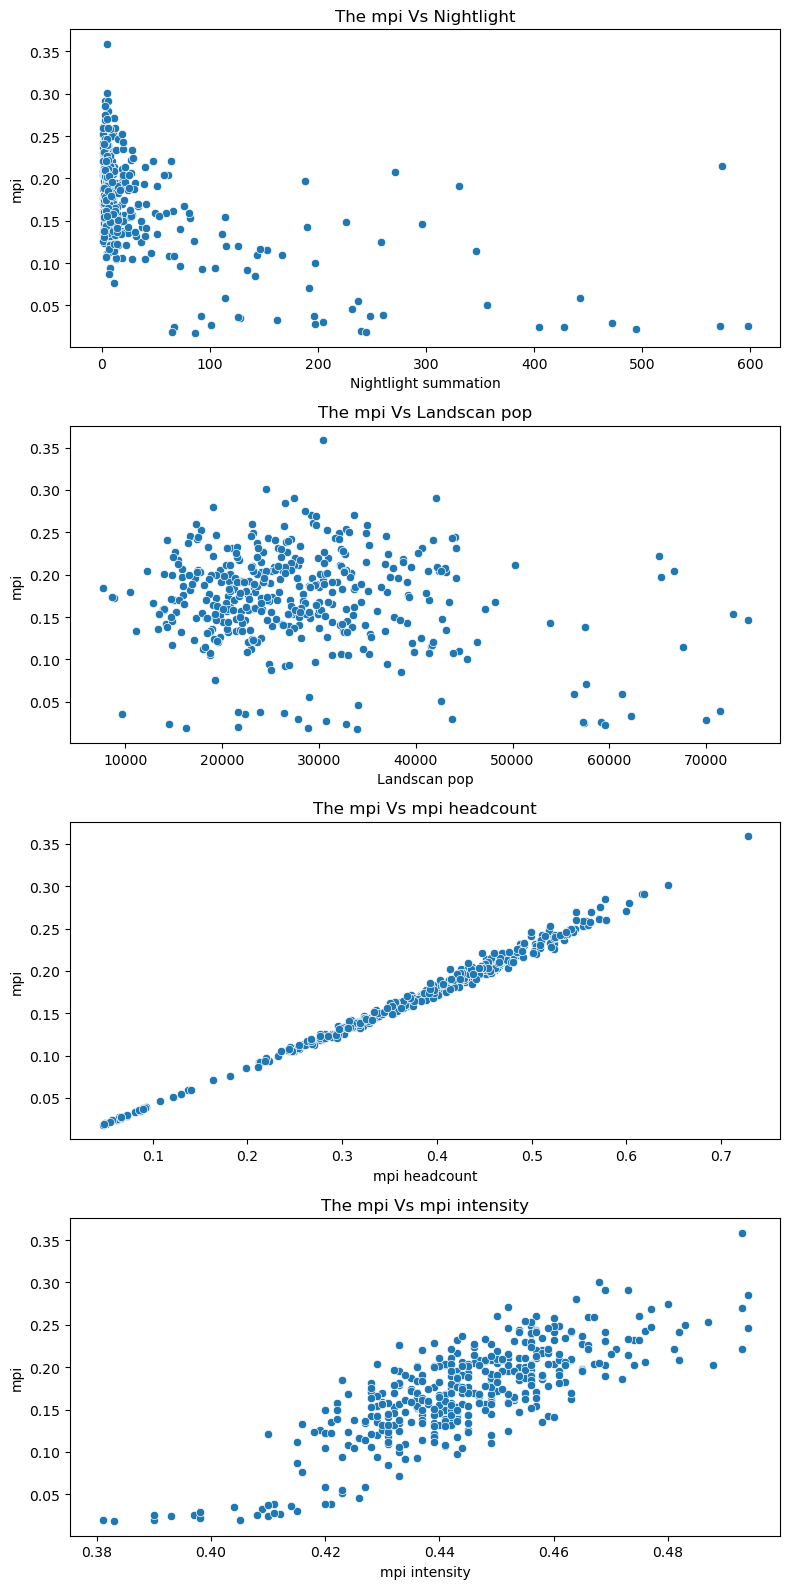

<Figure size 640x480 with 0 Axes>

In [9]:
fig, axs = plt.subplots(4, 1, figsize=(8, 16))


sns.scatterplot(data=df_mpi, x='nightlight_sum',y='mpi', ax=axs[0])
axs[0].set(title='The mpi Vs Nightlight', xlabel='Nightlight summation', ylabel='mpi')
sns.scatterplot(data=df_mpi, x='landscan_pop',y='mpi', ax=axs[1])
axs[1].set(title='The mpi Vs Landscan pop', xlabel='Landscan pop', ylabel='mpi')
sns.scatterplot(data=df_mpi, x='mpi_headcount',y='mpi', ax=axs[2])
axs[2].set(title='The mpi Vs mpi headcount', xlabel='mpi headcount', ylabel='mpi')

sns.scatterplot(data=df_mpi, x='mpi_intensity',y='mpi', ax=axs[3])
axs[3].set(title='The mpi Vs mpi intensity', xlabel='mpi intensity', ylabel='mpi')
fig.tight_layout()
plt.show()
plt.savefig("scatterplots.png")

##### Checking if the relationship between feature variables and dependent variable is linear

In [10]:
from scipy import stats

variables1 = ['nightlight_sum', 'landscan_pop', 'mpi_headcount', 'mpi_intensity']

for var in variables1:
    corr, p_val = stats.pearsonr(df_mpi[var], df_mpi['mpi'])
    print(f'Correlation coefficient of {var}:', corr)
    print(f'p-value of {var}:', p_val)
    print("\n")


Correlation coefficient of nightlight_sum: -0.5283488215627702
p-value of nightlight_sum: 2.761769195384477e-31


Correlation coefficient of landscan_pop: -0.17278184955090164
p-value of landscan_pop: 0.00039993179368868006


Correlation coefficient of mpi_headcount: 0.9953781778518249
p-value of mpi_headcount: 0.0


Correlation coefficient of mpi_intensity: 0.7998831131635527
p-value of mpi_intensity: 7.778031962951405e-94




d. Calculate the following correlations for each feature (Xi) with the MPI (y):
i. X vs y
ii. log X vs y
iii. X vs log y
iv. log X vs log y
v. Which are the strongest correlations for each feature?

In [11]:
X_cols = ['nightlight_sum', 'landscan_pop', 'mpi_headcount', 'mpi_intensity']
y_col = 'mpi'


In [12]:
df=df_mpi[['nightlight_sum', 'landscan_pop', 'mpi_headcount', 'mpi_intensity','mpi']]

##### i. Correlation between X and Y variables

In [13]:
correlations = {}
for col in X_cols:
    corr1 = df[[col, y_col]].corr().iloc[0, 1]
    correlations[(col, y_col)] = corr1

correlations_table = PrettyTable()
correlations_table.field_names = ["Features", "Correlation"]

for k, v in correlations.items():
    correlations_table.add_row([f"({k[0]}, mpi)", v])

print(correlations_table)


+-----------------------+---------------------+
|        Features       |     Correlation     |
+-----------------------+---------------------+
| (nightlight_sum, mpi) | -0.5283488215627697 |
|  (landscan_pop, mpi)  | -0.1727818495509015 |
|  (mpi_headcount, mpi) |  0.9953781778518255 |
|  (mpi_intensity, mpi) |  0.7998831131635521 |
+-----------------------+---------------------+


##### ii. Correlation between Log (X) vs Y 

In [14]:
correlation_2 = {}
for col in X_cols:
    log_x = np.log(df[col])
    y = df[y_col]
    corr2 = log_x.corr(y)
    correlation_2[(f"Log({col})", y_col)] = corr2

correlations_df2 = pd.DataFrame.from_dict(correlation_2, orient='index', columns=['correlation'])

table = PrettyTable()
table.field_names = ["Features", "Correlation"]

for index, row in correlations_df2.iterrows():
    table.add_row([index[0] + " vs " + index[1], round(row['correlation'], 3)])

print(table)


+----------------------------+-------------+
|          Features          | Correlation |
+----------------------------+-------------+
| Log(nightlight_sum) vs mpi |    -0.576   |
|  Log(landscan_pop) vs mpi  |    -0.114   |
| Log(mpi_headcount) vs mpi  |    0.922    |
| Log(mpi_intensity) vs mpi  |    0.803    |
+----------------------------+-------------+


##### iii. Correlation between X and Log(Y)

In [15]:
from prettytable import PrettyTable

correlation_3 = {}
for col in X_cols:
    x = df[col]
    log_y = np.log(df[y_col])
    corr3 = x.corr(log_y)
    correlation_3[(f"{col}", f"log({y_col})")] = corr3
correlations_df3 = pd.DataFrame.from_dict(correlation_3, orient='index', columns=['correlation'])

# create a pretty table
table = PrettyTable()
table.field_names = ['Variable', 'Correlation']
for key, value in correlation_3.items():
    table.add_row([f"({key[0]}, {key[1]})", value])
#     table.add_row([, ''])

# display the table
print(table)


+----------------------------+---------------------+
|          Variable          |     Correlation     |
+----------------------------+---------------------+
| (nightlight_sum, log(mpi)) | -0.6389269687490735 |
|  (landscan_pop, log(mpi))  | -0.2233421338720428 |
| (mpi_headcount, log(mpi))  |  0.9422003792915737 |
| (mpi_intensity, log(mpi))  |  0.7691127308364137 |
+----------------------------+---------------------+


##### iv. Correlation between Log (X )and Log (Y)

In [16]:
from prettytable import PrettyTable

correlation_4 = {}
for col in X_cols:
    log_x = np.log(df[col])
    log_y = np.log(df[y_col])
    corr4 = log_x.corr(log_y)
    correlation_4[(f"log {col}", f"log({y_col})")] = corr4
correlations_df4 = pd.DataFrame.from_dict(correlation_4, orient='index', columns=['correlation'])

# create a pretty table
table = PrettyTable()
table.field_names = ['Variable', 'Correlation']
for key, value in correlation_4.items():
    table.add_row([f"({key[0]}, {key[1]})", value])

# display the table
print(table)


+--------------------------------+----------------------+
|            Variable            |     Correlation      |
+--------------------------------+----------------------+
| (log nightlight_sum, log(mpi)) | -0.6170780029712375  |
|  (log landscan_pop, log(mpi))  | -0.16011031369824708 |
| (log mpi_headcount, log(mpi))  |  0.9985073413337329  |
| (log mpi_intensity, log(mpi))  |  0.7818760495665169  |
+--------------------------------+----------------------+


##### v. The Strongest correlation of each feature

In [17]:
correlations = {}
for col in X_cols:
    corr1 = df[[col, y_col]].corr().iloc[0, 1]
    correlations[(col, y_col)] = corr1
    
    log_x = np.log(df[col])
    y = df[y_col]
    corr2 = log_x.corr(y)
    correlations[(f"Log({col})", y_col)] = corr2
    
    x = df[col]
    log_y = np.log(df[y_col])
    corr3 = x.corr(log_y)
    correlations[(f"{col}", f"log({y_col})")] = corr3
    
    log_y = np.log(df[y_col])
    corr4 = np.log(df[col]).corr(log_y)
    correlations[(f"Log({col})", f"log({y_col})")] = corr4
correlations_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['correlation'])
strongest_correlations = correlations_df.groupby(level=0)['correlation'].apply(lambda x: x.abs().max())
strongest_correlations = strongest_correlations.sort_values(ascending=False)
df_strongest_correlations = pd.DataFrame(strongest_correlations)
df_strongest_correlations.columns = ['Strongest correlation']
df_strongest_correlations = df_strongest_correlations.reset_index()
df_strongest_correlations.columns = ['Feature', 'Strongest correlation']
df_strongest_correlations


,Feature,Strongest correlation
0,"(Log(mpi_headcount), log(mpi))",0.998507
1,"(mpi_headcount, mpi)",0.995378
2,"(mpi_headcount, log(mpi))",0.942200
3,"(Log(mpi_headcount), mpi)",0.922131
4,"(Log(mpi_intensity), mpi)",0.803473
5,"(mpi_intensity, mpi)",0.799883
6,"(Log(mpi_intensity), log(mpi))",0.781876
7,"(mpi_intensity, log(mpi))",0.769113
8,"(nightlight_sum, log(mpi))",0.638927
9,"(Log(nightlight_sum), log(mpi))",0.617078


In [18]:
df_filtered = df_strongest_correlations.iloc[[0, 4, 8, 12]]
df_filtered.loc[8, 'Strongest correlation'] = -df_filtered.loc[8, 'Strongest correlation']
df_filtered.loc[12, 'Strongest correlation'] = -df_filtered.loc[12, 'Strongest correlation']
table = tabulate(df_filtered, headers=['Feature', 'Strongest correlation'], tablefmt='pretty')
print(table)

+----+------------------------------------+-----------------------+
|    |              Feature               | Strongest correlation |
+----+------------------------------------+-----------------------+
| 0  | ('Log(mpi_headcount)', 'log(mpi)') |  0.9985073413337329   |
| 4  |   ('Log(mpi_intensity)', 'mpi')    |  0.8034733734916467   |
| 8  |   ('nightlight_sum', 'log(mpi)')   |  -0.6389269687490735  |
| 12 |    ('landscan_pop', 'log(mpi)')    |  -0.2233421338720428  |
+----+------------------------------------+-----------------------+


### TASK 7

 We ensure that our features are intuitive. Since the MPI (y) has a
population and an area component we create versions of our features that
take these components into consideration. This prevents either the area or
population overly influencing any feature. This will also serve to normalize the
variables. Create the following features:

##### i. Nightlight per capita


In [19]:
df_mpi['nightlight_per_capita']=df_mpi['nightlight_sum']/df_mpi['landscan_pop']
df_mpi['population_density']=df_mpi['landscan_pop']/df_mpi['Area']

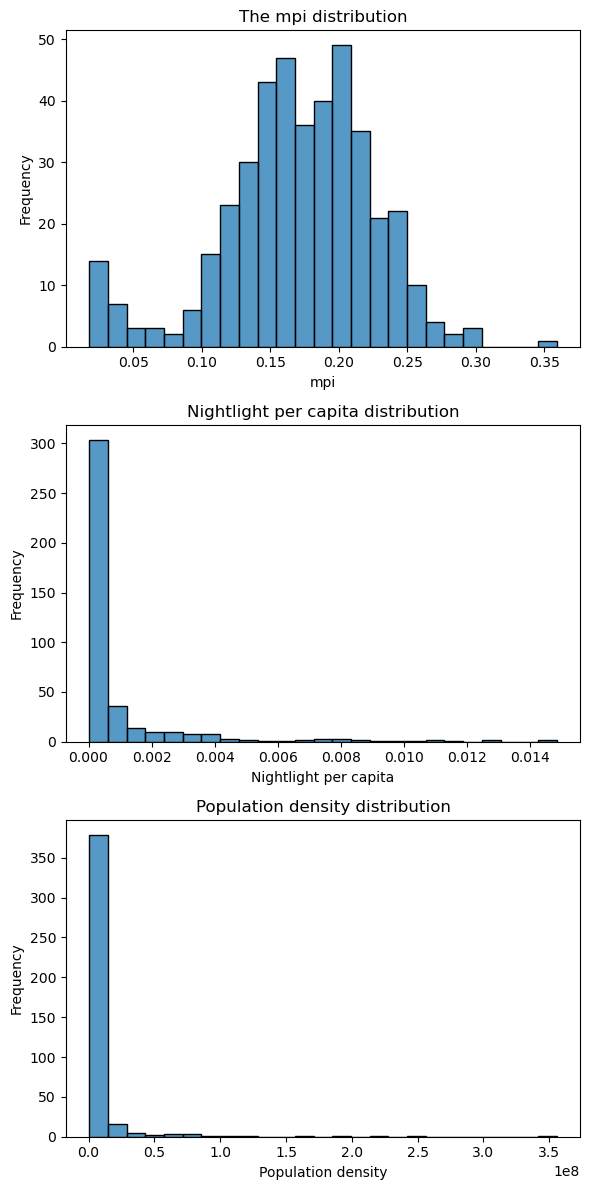

<Figure size 640x480 with 0 Axes>

In [20]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(6, 12))

sns.histplot(data=df, x=df_mpi['mpi'], bins=25, ax=axs[0])
axs[0].set_title('The mpi distribution')
axs[0].set_xlabel('mpi')
axs[0].set_ylabel('Frequency')

sns.histplot(data=df_mpi, x=df_mpi['nightlight_per_capita'], bins=25, ax=axs[1])
axs[1].set_title('Nightlight per capita distribution')
axs[1].set_xlabel('Nightlight per capita')
axs[1].set_ylabel('Frequency')

sns.histplot(data=df_mpi, x=df_mpi['population_density'], bins=25, ax=axs[2])
axs[2].set_title('Population density distribution')
axs[2].set_xlabel('Population density')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
plt.savefig("histplots2.png")

##### Checking if features are normally distributed

In [21]:
variables = [ 'mpi','nightlight_per_capita','population_density']
alpha = 0.05

for variable in variables:
    stat, p = shapiro(df_mpi[variable])
    
    if p > alpha:
        print(f'{variable}: Sample looks Gaussian (fail to reject H0)')
    else:
        print(f'{variable}: Sample does not look Gaussian (reject H0)')

mpi: Sample does not look Gaussian (reject H0)
nightlight_per_capita: Sample does not look Gaussian (reject H0)
population_density: Sample does not look Gaussian (reject H0)


In [22]:
X_cols = ['nightlight_per_capita','population_density']
y_col = 'mpi'

In [23]:
df=df_mpi[['nightlight_per_capita','population_density','mpi']]

##### i. Correlation between X and Y variables

In [24]:

correlation5 = {}
for col in X_cols:
    corr5 = df[[col, y_col]].corr().iloc[0, 1]
    correlation5[(col, y_col)] = corr5
correlations_df5 = pd.DataFrame.from_dict(correlation5, orient='index', columns=['correlation'])

# Create a pretty table
table = PrettyTable()
table.field_names = ["Variables", "Correlation"]

# Add rows to the table
for key, value in correlation5.items():
    table.add_row([key[0] + " vs " + key[1], round(value, 2)])

print(table)


+------------------------------+-------------+
|          Variables           | Correlation |
+------------------------------+-------------+
| nightlight_per_capita vs mpi |    -0.55    |
|  population_density vs mpi   |    -0.49    |
+------------------------------+-------------+


##### ii. Correlation between Log (X) vs Y 

In [25]:
correlation_6 = {}
for col in X_cols:
    log_x = np.log(df[col])
    y = df[y_col]
    corr6 = log_x.corr(y)
    correlation_6[(f"Log({col})", y_col)] = corr6

correlations_df6 = pd.DataFrame.from_dict(correlation_6, orient='index', columns=['correlation'])
table = PrettyTable()
table.field_names = ["Variable Pair", "Correlation"]
for index, row in correlations_df6.iterrows():
    table.add_row([index, row["correlation"]])

print(table)


+---------------------------------------+---------------------+
|             Variable Pair             |     Correlation     |
+---------------------------------------+---------------------+
| ('Log(nightlight_per_capita)', 'mpi') | -0.6053583063186241 |
|   ('Log(population_density)', 'mpi')  | -0.6174372888367271 |
+---------------------------------------+---------------------+


##### iii. Correlation between X and Log(Y)

In [26]:
correlation_8 = {}
for col in X_cols:
    x = df[col]
    log_y = np.log(df[y_col])
    corr8 = x.corr(log_y)
    correlation_8[(f"{col}", f"log({y_col})")] = corr8
correlations_df8 = pd.DataFrame.from_dict(correlation_8, orient='index', columns=['correlation'])

table = PrettyTable()
table.field_names = ["Variable 1", "Variable 2", "Correlation"]
for key, value in correlation_8.items():
    table.add_row([key[0], key[1], value])

print(table)


+-----------------------+------------+---------------------+
|       Variable 1      | Variable 2 |     Correlation     |
+-----------------------+------------+---------------------+
| nightlight_per_capita |  log(mpi)  | -0.6604966836916588 |
|   population_density  |  log(mpi)  | -0.6682808064591083 |
+-----------------------+------------+---------------------+


##### iv. Correlation between Log (X )and Log (Y)

In [27]:
correlation_7= {}
for col in X_cols:
    log_x = np.log(df[col])
    log_y = np.log(df[y_col])
    corr7 = log_x.corr(log_y)
    correlation_7[(f"log({col})", f"log({y_col})")] = corr7
correlations_df7 = pd.DataFrame.from_dict(correlation_7, orient='index', columns=['correlation'])

table = PrettyTable()
table.field_names = ["Variable 1", "Variable 2", "Correlation"]
for key, value in correlation_7.items():
    table.add_row([key[0], key[1], value])

print(table)


+----------------------------+------------+---------------------+
|         Variable 1         | Variable 2 |     Correlation     |
+----------------------------+------------+---------------------+
| log(nightlight_per_capita) |  log(mpi)  | -0.6383042350797379 |
|  log(population_density)   |  log(mpi)  | -0.7453312898008179 |
+----------------------------+------------+---------------------+


##### v. The Strongest correlation of each feature

In [28]:
correlations = {}
for col in X_cols:
    corr5 = df[[col, y_col]].corr().iloc[0, 1]
    correlations[(col, y_col)] = corr5
    
    log_x = np.log(df[col])
    y = df[y_col]
    corr6 = log_x.corr(y)
    correlations[(f"Log({col})", y_col)] = corr6
    
    x = df[col]
    log_y = np.log(df[y_col])
    corr8 = x.corr(log_y)
    correlations[(f"{col}", f"log({y_col})")] = corr8
    
    log_y = np.log(df[y_col])
    corr7 = np.log(df[col]).corr(log_y)
    correlations[(f"Log({col})", f"log({y_col})")] = corr7
correlations_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['correlation'])
strongest_correlations = correlations_df.groupby(level=0)['correlation'].apply(lambda x: x.abs().max())
strongest_correlations = strongest_correlations.sort_values(ascending=False)
df_strongest_correlations = pd.DataFrame(strongest_correlations)
df_strongest_correlations.columns = ['Strongest correlation']
df_strongest_correlations = df_strongest_correlations.reset_index()
df_strongest_correlations.columns = ['Feature', 'Strongest correlation']
df_strongest_correlations

,Feature,Strongest correlation
0,"(Log(population_density), log(mpi))",0.745331
1,"(population_density, log(mpi))",0.668281
2,"(nightlight_per_capita, log(mpi))",0.660497
3,"(Log(nightlight_per_capita), log(mpi))",0.638304
4,"(Log(population_density), mpi)",0.617437
5,"(Log(nightlight_per_capita), mpi)",0.605358
6,"(nightlight_per_capita, mpi)",0.546978
7,"(population_density, mpi)",0.487136


In [29]:
if df_strongest_correlations.shape[0] != 13:
    df_filtered = df_strongest_correlations.iloc[[0, 2], :].copy()
    df_filtered.loc[0, 'Strongest correlation'] = -df_filtered.loc[0, 'Strongest correlation']
    df_filtered.loc[2, 'Strongest correlation'] = -df_filtered.loc[2, 'Strongest correlation']
else:
    print("Dataframe does not have at least 13 rows.")
table = tabulate(df_filtered, headers=['Feature', 'Strongest correlation'], tablefmt='pretty')
print(table)

+---+-----------------------------------------+-----------------------+
|   |                 Feature                 | Strongest correlation |
+---+-----------------------------------------+-----------------------+
| 0 | ('Log(population_density)', 'log(mpi)') |  -0.7453312898008179  |
| 2 |  ('nightlight_per_capita', 'log(mpi)')  |  -0.6604966836916588  |
+---+-----------------------------------------+-----------------------+


### TASK 8

Using the strongest correlations from the previous question, check if the
features we have selected are significant in explaining
the MPI

In [30]:
df['log(population_density)']=np.log(df['population_density'])
df['log(nightlight_per_capita)']=np.log(df['nightlight_per_capita'])
df['log(mpi)']=np.log(df['mpi'])
df.head()

,nightlight_per_capita,population_density,mpi,log(population_density),log(nightlight_per_capita),log(mpi)
0,0.003293,3.556028e+08,0.027,19.689325,-5.715847,-3.611918
1,0.004296,1.040623e+07,0.126,16.157915,-5.450176,-2.071473
2,0.005065,1.116131e+07,0.092,16.227964,-5.285313,-2.385967
3,0.002601,2.249614e+08,0.033,19.231439,-5.951988,-3.411248
4,0.002135,5.394657e+06,0.159,15.500919,-6.149223,-1.838851


##### i. Baskward-Stepwise 

In [31]:
# X = df_mpi[['nightlight_per_capita','population_density']]
# y = df_mpi['mpi']

X = df[['nightlight_per_capita','log(population_density)']]
y = df['log(mpi)']

In [32]:
def backward_regression(X, y, threshold_out, verbose=False):
    included = list(X.columns)
    pvalues = pd.Series(index=X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        new_pvalues = model.pvalues.iloc[1:]
        pvalues.loc[new_pvalues.index] = new_pvalues
        worst_pval = new_pvalues.max() # null if new_pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = new_pvalues.idxmax()
            included.remove(worst_feature)
            pvalues.drop(worst_feature, inplace=True)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return pvalues

In [33]:
pvalues = backward_regression(X, y, 0.05)
print(pvalues)

nightlight_per_capita      8.738206e-38
log(population_density)    3.531911e-59
dtype: float64


In [34]:
 model = sm.OLS(y, sm.add_constant(pd.DataFrame(X))).fit()
yhat=model.predict( sm.add_constant(pd.DataFrame(X)))

In [35]:
statt.ttest_ind(y, yhat)

Ttest_indResult(statistic=-4.289079502183217e-12, pvalue=0.9999999999965788)

##### ii. Ridge regression

In [36]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=101)

In [37]:
ols = linear_model.Ridge()
ols.fit(X, y)
# Get the p-values
pvals = statts.coef_pval(ols, X, y)

# Print the variable name and its p-value
for i in range(len(X.columns)):
    print(f"{X.columns[i]}: {pvals[i]}")

nightlight_per_capita: 0.0
log(population_density): 0.98372373029846


######  The overall p-value of the Ridge model

In [38]:
y_prediction=ols.predict(X)

In [39]:
statt.ttest_ind(y, y_prediction)

Ttest_indResult(statistic=-3.6950221613730074e-14, pvalue=0.9999999999999706)

##### iii. Elastic Net

In [40]:
ols1 = linear_model.ElasticNet()
ols1.fit(X, y)
pval = statts.coef_pval(ols1, X, y)
for i in range(len(X.columns)):
    print(f"{X.columns[i]}: {pval[i]}")

nightlight_per_capita: 0.00022640373294691152
log(population_density): 1.0


######  The overall p-value of the Elastic Net model

In [41]:
y1_prediction=ols1.predict(X)

In [42]:
statt.ttest_ind(y, y1_prediction)

Ttest_indResult(statistic=-9.203544422469793e-15, pvalue=0.9999999999999927)

### TASK 9

##### a. Using LASSO, calculate the estimated MPI (log yhat) for each sector

In [43]:
lasso = LassoCV()
lasso.fit(X, y)
y_pred = lasso.predict(X)
r2 = r2_score(y, y_pred)

##### Correlation

In [44]:
corr_coef = np.corrcoef(y, y_pred)
corr = corr_coef[0,1]
corr

0.7908915199287054

##### R-squared calculation

In [45]:
r2 = r2_score(y, y_pred)
r2

0.6239752686371511

In [46]:
Table = PrettyTable()
Table.field_names = [" ", "Dependent variables"]
Table.add_row(["Correlation", corr])
Table.add_row(["R-squared", r2])

Table.border = True  
Table.title = " Measurements " 
Table.title_style = {"border": True, "color": "blue"} 

# Print the table
print(Table)


+-----------------------------------+
|            Measurements           |
+-------------+---------------------+
|             | Dependent variables |
+-------------+---------------------+
| Correlation |  0.7908915199287054 |
|  R-squared  |  0.6239752686371511 |
+-------------+---------------------+


### TASK 10

In [47]:
df_MPI['log(mpi)']=y
df_MPI['predicted log(mpi)'] = y_pred

In [49]:
# df_MPI.to_excel(' MPIAssignment.xlsx', index=False)